<a href="https://colab.research.google.com/github/francesca-leonardi/Learning-Machine-Learning/blob/main/linear_regression_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Mean Square Error considering all variables is 7300808230393.19
The Mean Square Error considering all variables except longitude is 8590534931952.737
The Mean Square Error considering all variables except latitude is 8709789014620.9
The Mean Square Error considering all variables except housing_median_age is 7566646789137.543
The Mean Square Error considering all variables except total_rooms is 7335894182088.536
The Mean Square Error considering all variables except total_bedrooms is 7384119922223.687
The Mean Square Error considering all variables except population is 7680742122061.472
The Mean Square Error considering all variables except households is 7327402072733.878
The Mean Square Error considering all variables except median_income is 11864955392890.912


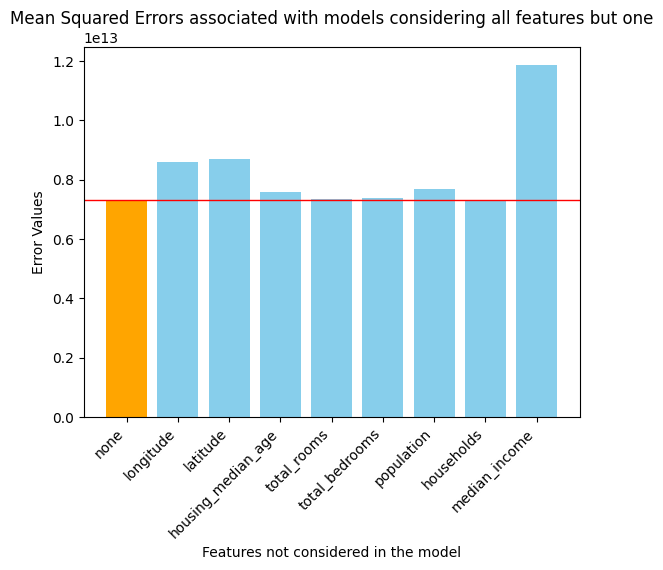

The Mean Square Error considering only longitude is 19142376115574.12
The Mean Square Error considering only latitude is 18824628371727.168
The Mean Square Error considering only housing_median_age is 19037803890990.934
The Mean Square Error considering only total_rooms is 18710478740663.156
The Mean Square Error considering only total_bedrooms is 19085325073415.723
The Mean Square Error considering only population is 19202647401393.074
The Mean Square Error considering only households is 19029271002567.152
The Mean Square Error considering only median_income is 10514903974010.406


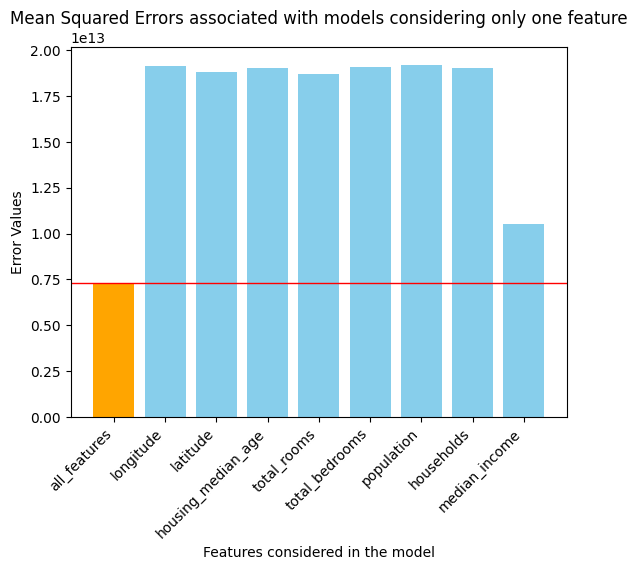

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


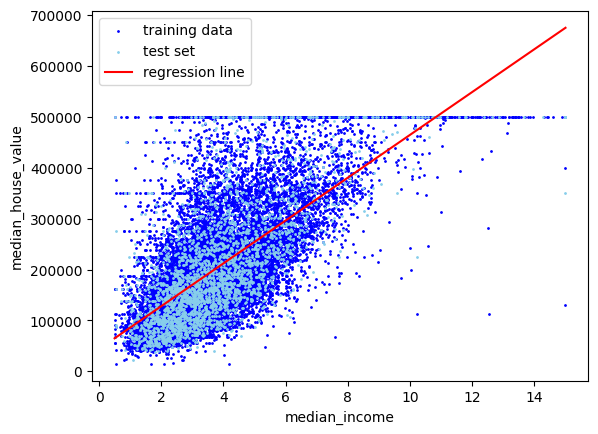

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

scaler = StandardScaler()

### The dataset contains data with the values of houses in California

df_train = pd.read_csv("/content/sample_data/california_housing_train.csv")
cols = df_train.columns

X_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:,-1]

### Linear regression model considering all the features

model = LinearRegression()
model.fit(X_train,y_train)

### Training set preparation

df_test = pd.read_csv("/content/sample_data/california_housing_test.csv")

X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1]

y_hat = model.predict(X_test)

### Mean Square Error

mse = (1/2)*sum((y_hat[i] - y_test[i])**2 for i in range(len(y_hat)))
print("The Mean Square Error considering all variables is",mse)

errors = [mse]
labels = ['none']

### Linear Regression models omitting one features each (reduced models)

for feature in cols[:-1]:
  X_red_train = X_train.drop(feature, axis = 1)
  X_red_test = X_test.drop(feature, axis = 1)

  model.fit(X_red_train,y_train)
  y_hat = model.predict(X_red_test)

  mse_red = (1/2)*sum((y_hat[i] - y_test[i])**2 for i in range(len(y_hat)))
  errors.append(mse_red)
  labels.append(feature)

  print("The Mean Square Error considering all variables except",feature,"is",mse_red)

### Plot showing the Mean Square Errors of the reduced models,
### compared with the Mean Square Error of the model taking in account all the features

colors = ['orange'] + ['skyblue'] * (len(labels) - 1)

plt.bar(labels, errors, color = colors)
plt.xticks(rotation=45, ha='right')
plt.axhline(y=mse, color='red', linestyle='-', linewidth=1, label="Threshold")

plt.xlabel("Features not considered in the model")
plt.ylabel("Error Values")
plt.title("Mean Squared Errors associated with models considering all features but one")

plt.show()

### Linear Regression models consideing only one features each (reduced models to one feature)

new_errors = [mse]

for feature in cols[:-1]:
  X_red_train = X_train[[feature]]
  X_red_test = X_test[[feature]]

  model.fit(X_red_train,y_train)
  y_hat = model.predict(X_red_test)

  mse_red = (1/2)*sum((y_hat[i] - y_test[i])**2 for i in range(len(y_hat)))
  new_errors.append(mse_red)

  print("The Mean Square Error considering only",feature,"is",mse_red)

### Plot showing the Mean Square Errors of the reduced models to only one feature,
### compared with the Mean Square Error of the model taking in account all the features

labels[0] = "all_features"

plt.bar(labels, new_errors, color = colors)
plt.xticks(rotation=45, ha='right')
plt.axhline(y=mse, color='red', linestyle='-', linewidth=1, label="Threshold")

plt.xlabel("Features considered in the model")
plt.ylabel("Error Values")
plt.title("Mean Squared Errors associated with models considering only one feature")

plt.show()

### Reduced model to only one feature with the best performance

min_error = min(new_errors[1:])
best_feature = labels[new_errors.index(min_error)]

X_best_train = X_train[[best_feature]]
X_best_test = X_test[[best_feature]]

model.fit(X_best_train,y_train)
y_hat = model.predict(X_best_test)

X_line = np.linspace(X_best_train.min(),X_best_train.max(),10)
y_line = model.predict(X_line)

plt.scatter(X_best_train,y_train, s = 1, color = 'blue', label = "training data")
plt.scatter(X_best_test,y_test, s = 1, color = 'skyblue', label = "test set")
plt.plot(X_line,y_line,'-', color = 'red', label = 'regression line')

plt.xlabel(best_feature)
plt.ylabel(cols[-1])
plt.legend()

plt.show()